In [2]:
# Dependencies
import requests
import matplotlib.pyplot as plt
from collections import Counter


In [105]:

response = requests.get('https://app.ticketmaster.com/discovery/v2/classifications?apikey=KiTAybgY7A9y1TG5k2RupJBbJgLiRfTL&locale=*').json()

    

In [106]:
# Extracting the 'name' values from the classifications

segments = [classification['segment']['name'] if "segment" in classification else "N/A" for classification in response["_embedded"]["classifications"]]

# Display the list of 'segment' values
# for segment in segments:
#     print(segment)
name_counts = Counter(segments)  
print(name_counts)

# # Creating a pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(name_counts.values(), labels=name_counts.keys(), autopct='%1.1f%%', startangle=140)
# plt.title('Classification Names')
    
#     # Displaying the pie chart
# plt.show()


Counter({'N/A': 11, 'Miscellaneous': 1, 'Sports': 1, 'Music': 1, 'Arts & Theatre': 1, 'Undefined': 1, 'Film': 1})


In [107]:
response_event=requests.get('https://app.ticketmaster.com/discovery/v2/events?apikey=KiTAybgY7A9y1TG5k2RupJBbJgLiRfTL&locale=*&page=2&countryCode=US')
response_json = response_event.json()

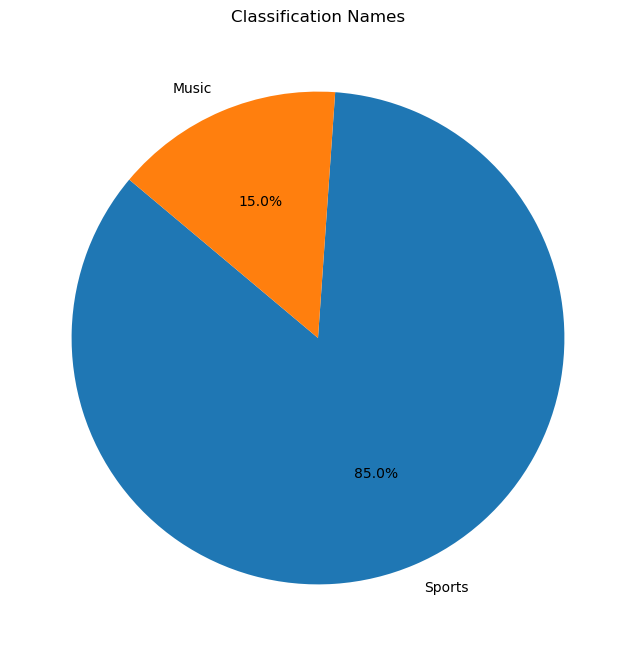

In [108]:
# Event class for today
# Extract 'segment' names from the event data
events = response_json.get("_embedded", {}).get("events", [])  # Extract the events list
segments = []

for event in events:
    classifications = event.get("classifications", [])  # Extract 'classifications' list for each event
    #print(classifications)
    for classification in classifications:
        segment_name = classification.get("segment",{}).get("name")
        segments.append(segment_name)
# Count the occurrences of each 'segment' name
name_counts = Counter(segments)

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(name_counts.values(), labels=name_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Classification Names')
    
    # Displaying the pie chart
plt.show()

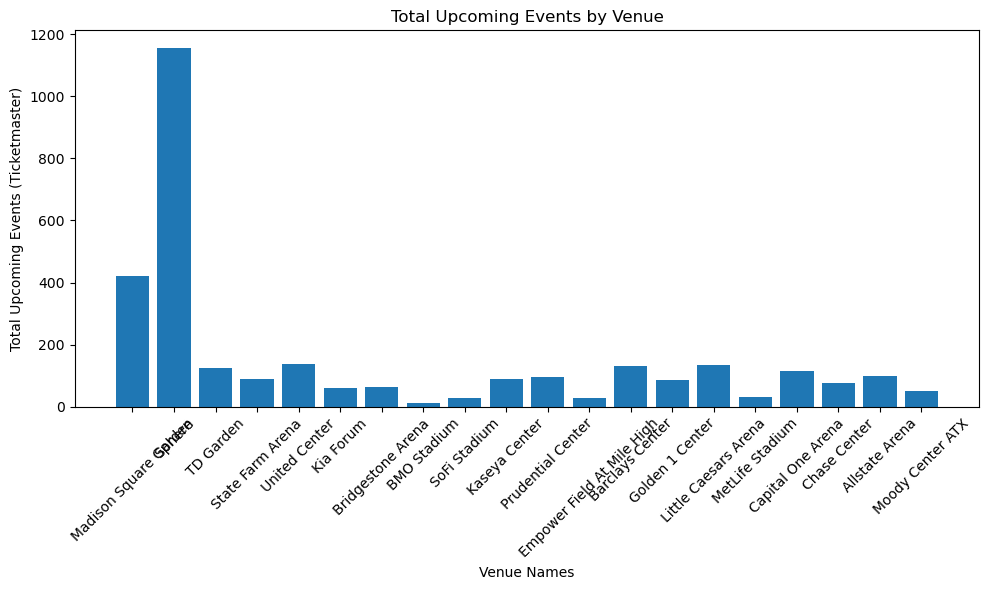

In [40]:
#Venue
response_venue=requests.get('https://app.ticketmaster.com/discovery/v2/venues?apikey=KiTAybgY7A9y1TG5k2RupJBbJgLiRfTL&locale=*&countryCode=US')
venue_data = response_venue.json()

venue = venue_data.get("_embedded", {}).get("venues", [])  # Extract the events list
venue_list=[]
upcoming=[]

        

for venues in venue:
    venue_name = venues.get("name", "")  # Extract 'venue name' list for each event
    venue_count=venues.get("upcomingEvents",{}).get("ticketmaster",0)
    venue_list.append(venue_name)
    upcoming.append(venue_count)

# Create a dictionary to associate venue names with their respective total upcoming events
venue_count = dict(zip(venue_list, upcoming))

# Extract venue names and counts
venue_names = list(venue_count.keys())
venue_counts = list(venue_count.values())

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(venue_names, venue_counts)

# Adding labels and title
plt.xlabel('Venue Names')
plt.ylabel('Total Upcoming Events (Ticketmaster)')
plt.title('Total Upcoming Events by Venue')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the graph
plt.tight_layout()
plt.show()

